In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.keras.__version__

'2.12.0'

In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [6]:
mnist=tf.keras.datasets.mnist

In [7]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
X_train_full.shape,X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [9]:
y_train_full.shape,y_train_full.dtype

((60000,), dtype('uint8'))

In [10]:
X_test.shape,X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [11]:
y_test.shape,y_test.dtype

((10000,), dtype('uint8'))

In [12]:
X_valid,X_train= X_train_full[:5000]/255, X_train_full[5000:]/255

In [13]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [14]:
X_test=X_test/255

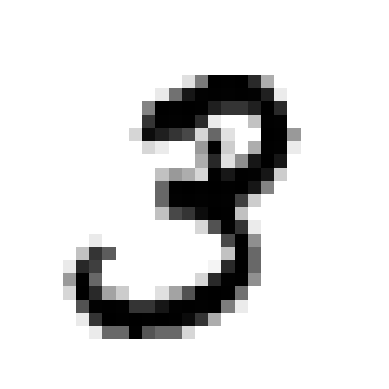

3

In [15]:
plt.imshow(X_train[1],cmap="binary")
plt.axis("off")
plt.show()
y_train[1]

In [17]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"),
]
model=tf.keras.models.Sequential(LAYERS)
model.layers

In [19]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [20]:
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

model.evaluate(X_test,y_test)
model.save("model.h5")

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6224 - accuracy: 0.8388 - val_loss: 0.3129 - val_accuracy: 0.9182
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2921 - accuracy: 0.9165 - val_loss: 0.2395 - val_accuracy: 0.9356
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2384 - accuracy: 0.9321 - val_loss: 0.2088 - val_accuracy: 0.9432
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2039 - accuracy: 0.9409 - val_loss: 0.1804 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1784 - accuracy: 0.9484 - val_loss: 0.1611 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1582 - accuracy: 0.9550 - val_loss: 0.1486 - val_accuracy: 0.9622
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1420 - accuracy: 0.9600 - val_loss: 0.1349 - val_accuracy:

In [21]:
loaded_model=tf.keras.models.load_model("model.h5")
model.evaluate(X_test,y_test)
pd.DataFrame(history.history)

313/313 [==============================] - 1s 5ms/step - loss: 0.0718 - accuracy: 0.9778


,loss,accuracy,val_loss,val_accuracy
0,0.622366,0.838818,0.312919,0.9182
1,0.292135,0.916527,0.239486,0.9356
2,0.238412,0.932055,0.208842,0.9432
3,0.203922,0.940873,0.180361,0.9518
4,0.178423,0.948418,0.161072,0.9544
5,0.158228,0.955018,0.148580,0.9622
6,0.142045,0.960036,0.134905,0.9658
7,0.128338,0.963727,0.129558,0.9656
8,0.116875,0.967255,0.118235,0.9678
9,0.107297,0.969418,0.112548,0.9720


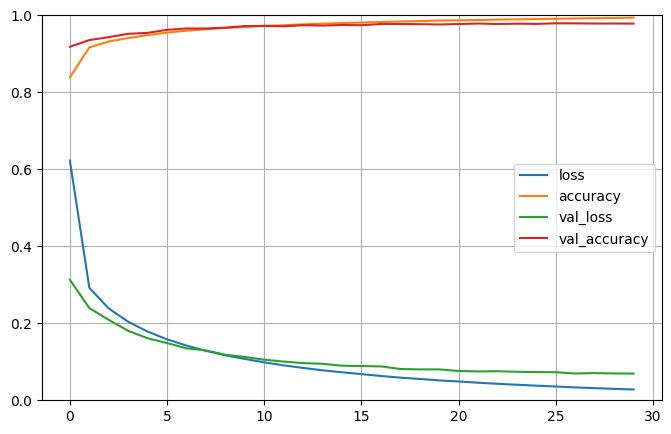

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
X_new=X_test[:5]
y_new=y_test[:5]
y_prob=model.predict(X_new)
y_prob.round(2)


1/1 [==============================] - 0s 347ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred=np.argmax(y_prob,axis=1)
y_pred,y_new

(array([7, 2, 1, 0, 4]), array([7, 2, 1, 0, 4], dtype=uint8))

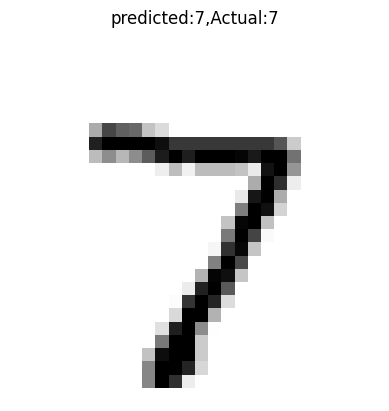

------------------------------------------------------------


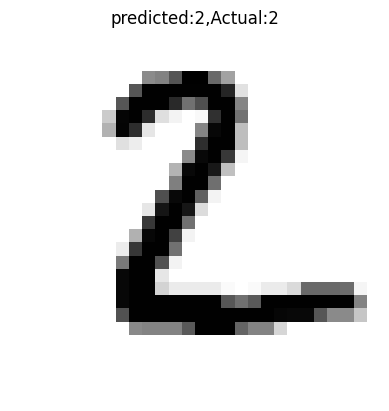

------------------------------------------------------------


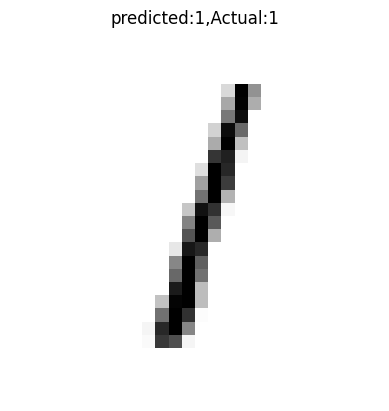

------------------------------------------------------------


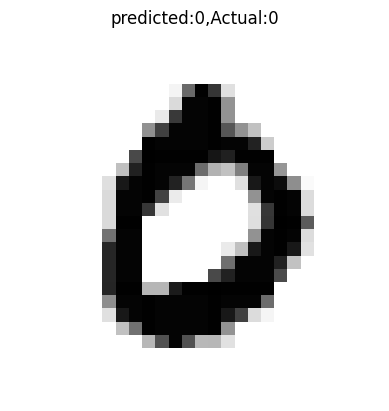

------------------------------------------------------------


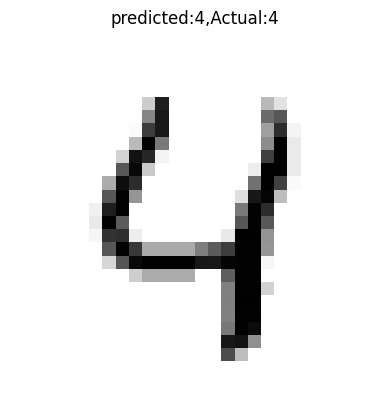

------------------------------------------------------------


In [26]:
for data,pred, actual in zip(X_new,y_pred,y_new):
  plt.imshow(data,cmap="binary")
  plt.title(f"predicted:{pred},Actual:{actual}",)
  plt.axis("off")
  plt.show()
  print("---"*20)